# Intermediate Level Task 2
# Prediction using Decision Tree  Algorithm

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

# Imports 

In [41]:
import requests
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assigning column names and fetching data
In this cell we have assigned the columns thier names as well as utilized the "requests.get" method to fetch the data from the UCI Machine Learning Repository.

We have also filtered out the text from the response and have split the text based on line changes("\n").

In [42]:
columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "Species"]
response = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
r = response.text
split_data = r.split('\n')

# Dataframe formation
In this step we are parsing the data and splitting each line based on a comma which separates all the feature values after that end we are converting it into a list.

After successfully splitting the features we have then converted the list into a dataframe which has the column names as we specified above.

In [43]:
data = list(i.split(',') for i in split_data)
df = pd.DataFrame(data, columns=columns).apply(pd.to_numeric, errors='ignore')
df = df.iloc[0:150,:]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Classifier
Below is the classifier that we are going to be using which is the "DecisionTreeClassifier", we have initialized it with the parameter "random_state = 42"

In [44]:
clf = DecisionTreeClassifier(random_state = 42)

# Splitting dataframe into features and labels
Here we have separated out the features and labels as follows:
1. data => Features
2. target => Labels

In [45]:
data = df.iloc[:,0:4]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
target = df.iloc[:,4]
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Splitting the feature and label vectors into traning and testing sets
In the step below we have utilized the "train_test_split" function in order to split our feature and label vectors into traning and testing sets.

1. X_train => training features/data
2. Y_train => training labels
3. X_test => testing features/data
4. Y_test => testing labels

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, train_size = 0.7, random_state = 42)

# Shapes of the traning and testing arrays

We can see that the labels are rank one arrays whereas the feature vectors are 2-dimensional

In [48]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (105, 4)
Shape of Y_train: (105,)
Shape of X_test: (45, 4)
Shape of Y_test: (45,)


# Fitting the classifier
We are fitting the classifier on the traning split of our data:

In [49]:
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# Finding accuracy

In [50]:
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)*100}%")

Accuracy: 100.0%


# Confusion Matrix

In [51]:
print(f"Confusion Matrix \n\n{confusion_matrix(Y_test, Y_pred)}")

Confusion Matrix 

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Visualizing the decision tree's graph

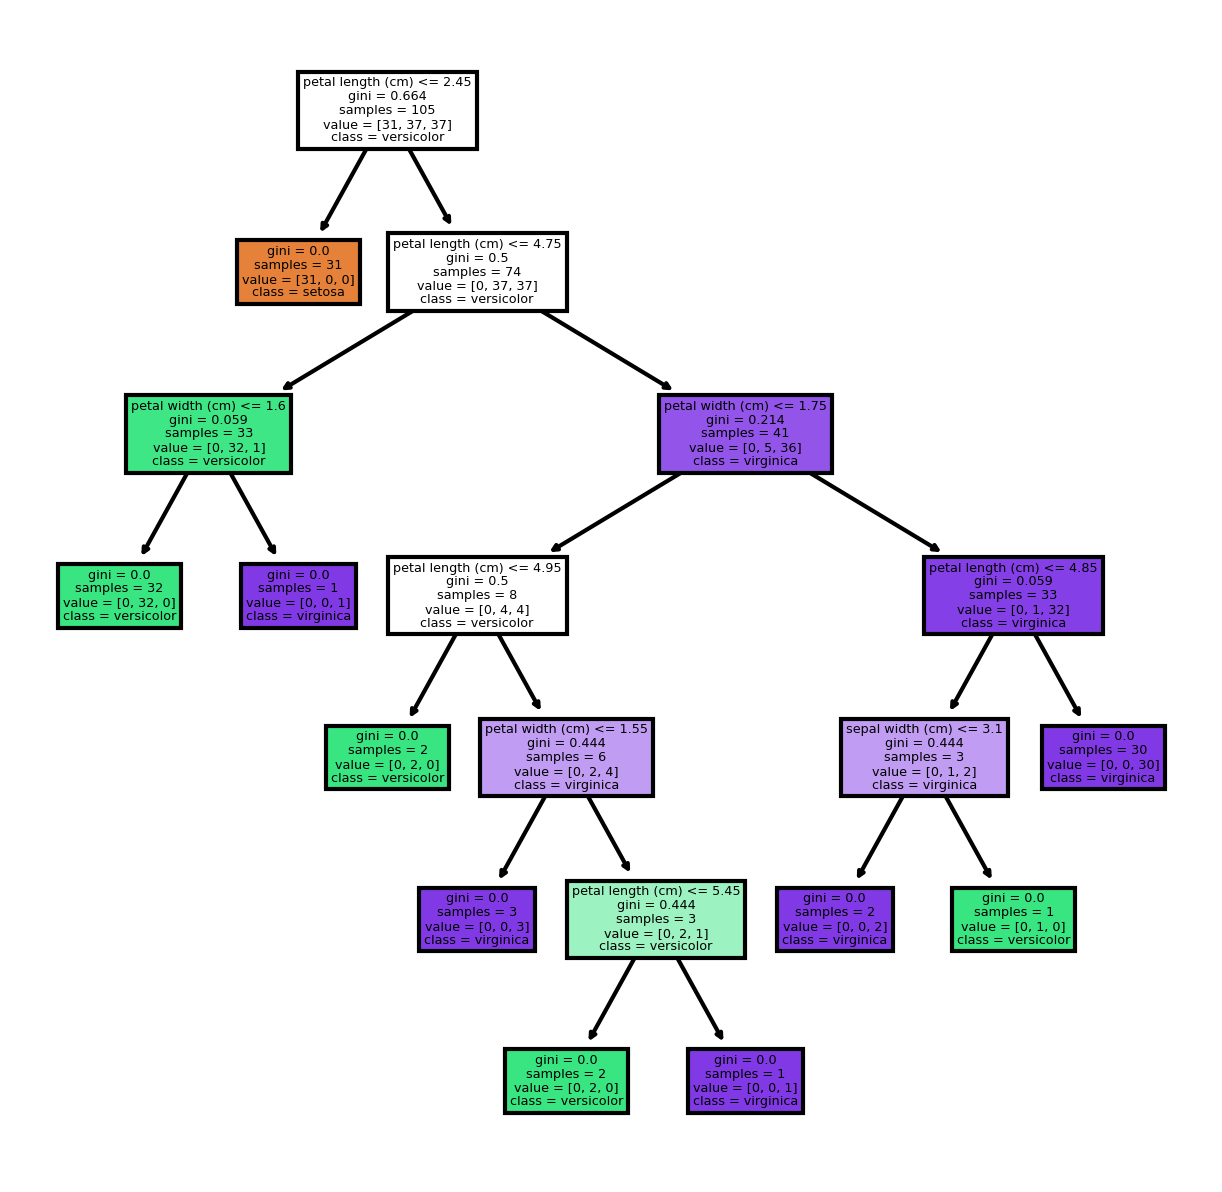

In [52]:
data=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
target=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(figsize = (5,5), dpi=300)
tree.plot_tree(clf,
               feature_names = data, 
               class_names=target,
               filled = True);